In [18]:
from graph_tool.all import Graph
from graph_tool.all import *
import graph_tool.all as gt

In [19]:
from graph_tool.all import Graph

def find_paths(graph, start, length):
    """6回の移動で出発点に戻ってくる経路を探索"""
    paths = []

    def dfs(current, path):
        if len(path) == length + 1:  # 出発点含め7ノードを通る（移動回数6）
            if path[0] == path[-1]:  # 出発点に戻る
                paths.append(path)
            return

        for neighbor in graph.vertex(int(current)).out_neighbors():
            dfs(str(neighbor), path + [str(neighbor)])

    dfs(start, [start])
    return paths

全経路数を手計算で求める（被りあり）

In [14]:
g = load_graph("/home/guest/o_t_hayashilab/Network_data/graph-tool/example_network/soc-karate.gt.gz")

# 結果の計算
all_paths = []
for start in range(g.num_vertices()):
    all_paths.extend(find_paths(g, str(start), 6))

# 結果の出力
print(f"条件を満たす経路の総数: {len(all_paths)}")
for path in all_paths:
    print(" -> ".join(path))

条件を満たす経路の総数: 119694
0 -> 1 -> 2 -> 3 -> 7 -> 1 -> 0
0 -> 1 -> 2 -> 3 -> 7 -> 2 -> 0
0 -> 1 -> 2 -> 3 -> 7 -> 3 -> 0
0 -> 1 -> 2 -> 3 -> 12 -> 3 -> 0
0 -> 1 -> 2 -> 3 -> 13 -> 1 -> 0
0 -> 1 -> 2 -> 3 -> 13 -> 2 -> 0
0 -> 1 -> 2 -> 3 -> 13 -> 3 -> 0
0 -> 1 -> 2 -> 3 -> 0 -> 1 -> 0
0 -> 1 -> 2 -> 3 -> 0 -> 2 -> 0
0 -> 1 -> 2 -> 3 -> 0 -> 3 -> 0
0 -> 1 -> 2 -> 3 -> 0 -> 4 -> 0
0 -> 1 -> 2 -> 3 -> 0 -> 5 -> 0
0 -> 1 -> 2 -> 3 -> 0 -> 6 -> 0
0 -> 1 -> 2 -> 3 -> 0 -> 7 -> 0
0 -> 1 -> 2 -> 3 -> 0 -> 8 -> 0
0 -> 1 -> 2 -> 3 -> 0 -> 10 -> 0
0 -> 1 -> 2 -> 3 -> 0 -> 11 -> 0
0 -> 1 -> 2 -> 3 -> 0 -> 12 -> 0
0 -> 1 -> 2 -> 3 -> 0 -> 13 -> 0
0 -> 1 -> 2 -> 3 -> 0 -> 17 -> 0
0 -> 1 -> 2 -> 3 -> 0 -> 19 -> 0
0 -> 1 -> 2 -> 3 -> 0 -> 21 -> 0
0 -> 1 -> 2 -> 3 -> 0 -> 31 -> 0
0 -> 1 -> 2 -> 3 -> 1 -> 2 -> 0
0 -> 1 -> 2 -> 3 -> 1 -> 3 -> 0
0 -> 1 -> 2 -> 3 -> 1 -> 7 -> 0
0 -> 1 -> 2 -> 3 -> 1 -> 13 -> 0
0 -> 1 -> 2 -> 3 -> 1 -> 17 -> 0
0 -> 1 -> 2 -> 3 -> 1 -> 19 -> 0
0 -> 1 -> 2 -> 3 -> 1 -> 21 -> 0
0 ->

被りを含めずに、再計算したもの

In [15]:
from graph_tool.all import Graph

def find_hexagonal_paths(graph, start, length):
    """6回の移動で出発点に戻る完全な6角形経路を探索"""
    paths = []

    def dfs(current, path):
        if len(path) == length + 1:  # 6回の移動（7ノード）
            if path[0] == path[-1]:  # 出発点に戻る
                paths.append(path)
            return

        for neighbor in graph.vertex(int(current)).out_neighbors():
            # ノードが重複しないように
            if str(neighbor) not in path or len(path) == length:
                dfs(str(neighbor), path + [str(neighbor)])

    dfs(start, [start])
    return paths

# グラフの読み込み
g = load_graph("/home/guest/o_t_hayashilab/Network_data/graph-tool/example_network/soc-karate.gt.gz")

# 結果の計算
hexagonal_paths = []
for start in range(g.num_vertices()):
    hexagonal_paths.extend(find_hexagonal_paths(g, str(start), 6))

# 結果の出力
print(f"完全な6角形で経路を形成している経路の総数: {len(hexagonal_paths)}")
for path in hexagonal_paths:
    print(" -> ".join(path))

完全な6角形で経路を形成している経路の総数: 11628
0 -> 1 -> 2 -> 7 -> 3 -> 12 -> 0
0 -> 1 -> 2 -> 7 -> 3 -> 13 -> 0
0 -> 1 -> 2 -> 8 -> 32 -> 31 -> 0
0 -> 1 -> 2 -> 8 -> 33 -> 13 -> 0
0 -> 1 -> 2 -> 8 -> 33 -> 19 -> 0
0 -> 1 -> 2 -> 8 -> 33 -> 31 -> 0
0 -> 1 -> 2 -> 9 -> 33 -> 8 -> 0
0 -> 1 -> 2 -> 9 -> 33 -> 13 -> 0
0 -> 1 -> 2 -> 9 -> 33 -> 19 -> 0
0 -> 1 -> 2 -> 9 -> 33 -> 31 -> 0
0 -> 1 -> 2 -> 13 -> 33 -> 8 -> 0
0 -> 1 -> 2 -> 13 -> 33 -> 19 -> 0
0 -> 1 -> 2 -> 13 -> 33 -> 31 -> 0
0 -> 1 -> 2 -> 13 -> 3 -> 7 -> 0
0 -> 1 -> 2 -> 13 -> 3 -> 12 -> 0
0 -> 1 -> 2 -> 27 -> 33 -> 8 -> 0
0 -> 1 -> 2 -> 27 -> 33 -> 13 -> 0
0 -> 1 -> 2 -> 27 -> 33 -> 19 -> 0
0 -> 1 -> 2 -> 27 -> 33 -> 31 -> 0
0 -> 1 -> 2 -> 27 -> 24 -> 31 -> 0
0 -> 1 -> 2 -> 28 -> 33 -> 8 -> 0
0 -> 1 -> 2 -> 28 -> 33 -> 13 -> 0
0 -> 1 -> 2 -> 28 -> 33 -> 19 -> 0
0 -> 1 -> 2 -> 28 -> 33 -> 31 -> 0
0 -> 1 -> 2 -> 32 -> 33 -> 8 -> 0
0 -> 1 -> 2 -> 32 -> 33 -> 13 -> 0
0 -> 1 -> 2 -> 32 -> 33 -> 19 -> 0
0 -> 1 -> 2 -> 32 -> 33 -> 31 -> 0
0 -> 1 -> 2

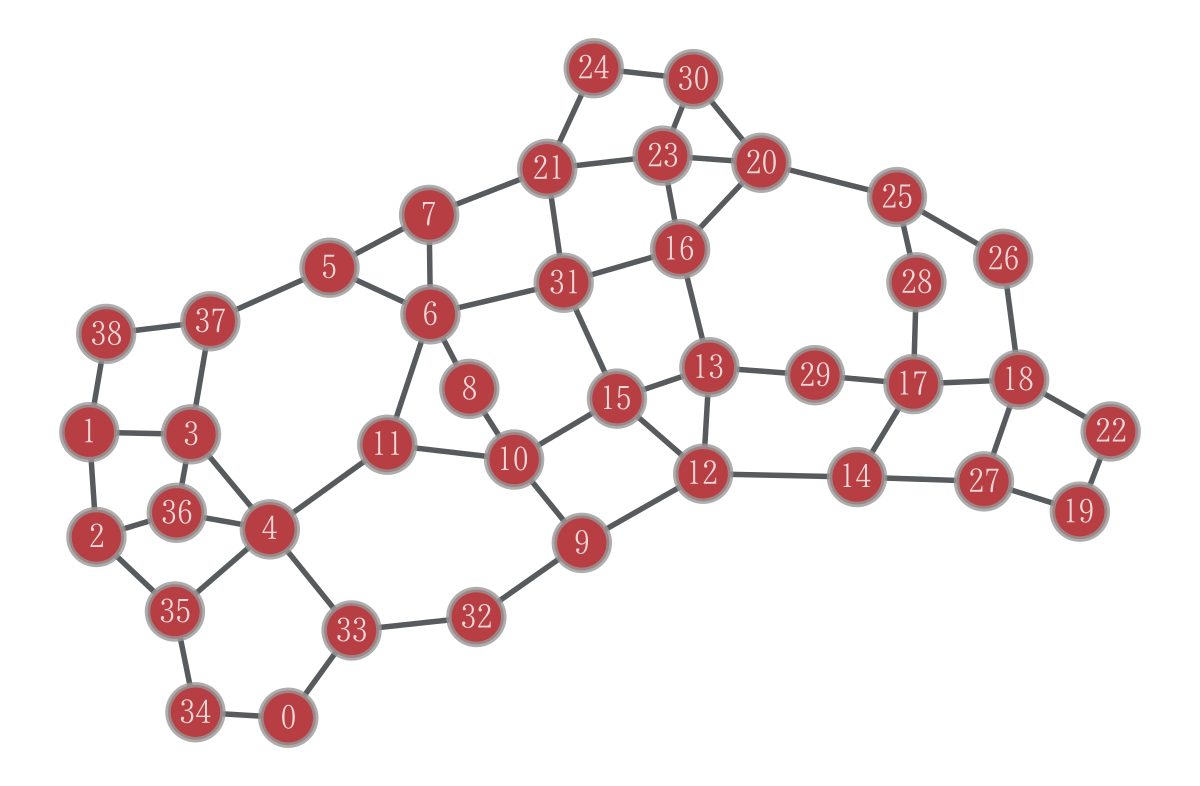

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7febe0df24e0, at 0x7febe0de9010>

In [8]:
gt.graph_draw(g, vertex_text = g.vertex_index)

In [17]:
from tqdm import tqdm
g = load_graph("/home/guest/o_t_hayashilab/Network_data/graph-tool/example_network/soc-karate.gt.gz")

node_id = 0

for i in range(g.num_vertices()):
    node_id_property = g.new_vertex_property("int")  # ノードIDを格納する新しいプロパティ

    node_id += 1  # 新しいノードIDを割り当てる
    node_id_property[g.vertex(i)] = node_id  # ノードIDをプロパティに格納

#このように、グラフを作る際に、各ノードに「node_id」を割り当てる必要がある

###
total_loop = 0
multiple_edge = 0
# グラフ g のすべてのノードとエッジを調査
for v in tqdm(g.vertices()):
    # 自己ループの検出
    if g.edge(v, v) is not None:
        print(f"ノード {int(g.vp.node_id[v])} に自己ループが存在します。")
        total_loop += 1

    # 多重リンクの検出
    for u in g.vertices():
        if u != v:
            edges = list(g.edge(v, u, all_edges=True))
            if len(edges) > 1:
                print(f"ノード {int(g.vp.node_id[v])} と {int(g.vp.node_id[u])} の間に多重リンクが存在します。")
                multiple_edge += 1

print(f"自己ループは{int(total_loop)}個あります。")
print(f"多重リンクは{int(multiple_edge)}個あります。")

34it [00:00, 10682.12it/s]

自己ループは0個あります。
多重リンクは0個あります。
